xgboost non installé, on ignore ce modèle.
Random Forest - accuracy test : 0.958
Gradient Boosting - accuracy test : 0.942


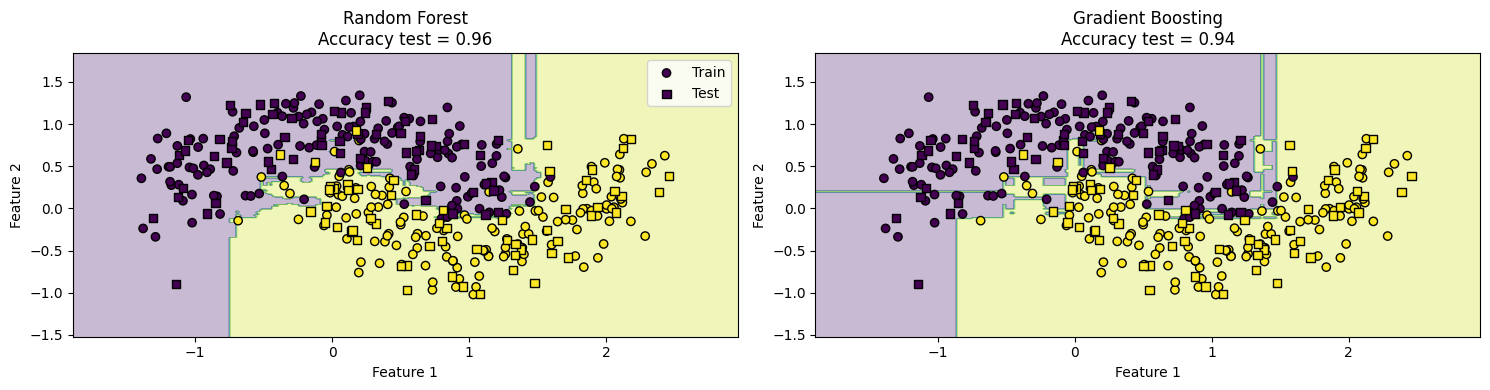

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Si XGBoost est installé :
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except ImportError:
    HAS_XGB = False
    print("xgboost non installé, on ignore ce modèle.")

# 1. Générer un dataset jouet (2D)
X, y = make_moons(n_samples=400, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2. Définir les modèles
models = [
    ("Random Forest",
     RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)),
    ("Gradient Boosting",
     GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42))
]

if HAS_XGB:
    models.append(
        ("XGBoost",
         XGBClassifier(
             n_estimators=200,
             max_depth=3,
             learning_rate=0.1,
             subsample=0.8,
             colsample_bytree=0.8,
             objective="binary:logistic",
             eval_metric="logloss",
             random_state=42,
             n_jobs=-1
         ))
    )

# 3. Entraîner les modèles + préparer la grille pour le graphe
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=(15, 4))

for i, (name, model) in enumerate(models, 1):
    # Entraînement
    model.fit(X_train, y_train)

    # Score sur le test
    acc = model.score(X_test, y_test)
    print(f"{name} - accuracy test : {acc:.3f}")

    # Prédiction sur la grille pour tracer la frontière de décision
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Graphe
    plt.subplot(1, len(models), i)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", marker="o", label="Train")
    plt.scatter(X_test[:, 0],  X_test[:, 1],  c=y_test,  edgecolor="k", marker="s", label="Test")
    plt.title(f"{name}\nAccuracy test = {acc:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    if i == 1:
        plt.legend()

plt.tight_layout()
plt.show()
